<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [93]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0
152,Tanzania,153,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
154,Central African Republic,155,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0


Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Страна (регион) название страны.
Лестница Кантрил-это мера удовлетворенности жизнью.
SD лестницы стандартное отклонение лестницы.
Положительный аффект мера положительных эмоций.
Отрицательный аффект мера отрицательной эмоции.
Социальная поддержка степень, в которой социальная поддержка способствовала вычислению балла счастья.
Степень, в которой свобода способствовала вычислению балла счастья.
Коррупция степень, в которой восприятие коррупции вносит свой вклад в оценку счастья.
Щедрость степень, в которой щедрость способствовала вычислению балла счастья.
Лог ВВП на душу населения степень, в которой ВВП вносит свой вклад в расчет балла счастья.
Ожидаемая продолжительность здоровой жизни степень, в которой ожидаемая продолжительность жизни внесла свой вклад в расчет показателя счастья.

Посмотреть первые несколько рядов таблицы

In [94]:
#Выводим первые 10 строк
df.head(10)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

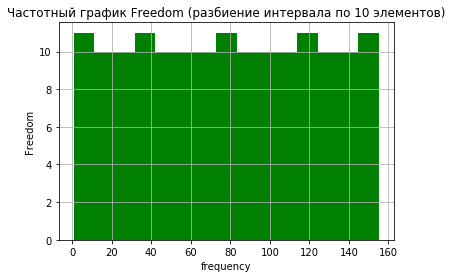

In [96]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Freedom'], 15, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 15 элементов)')
plt.grid(True)
plt.show()

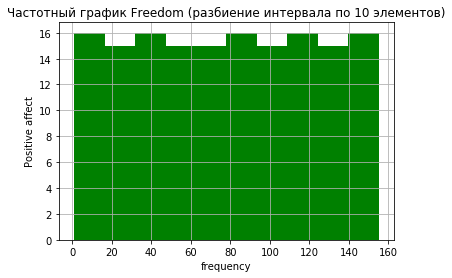

In [97]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [98]:
print('Медиана: ', statistics.median(df['Freedom']))
try:
    print('Значение моды: ', statistics.mode(df['Freedom']))
except:
    print('Нет МОДЫ т.к. в датафрейме все строки с уникальным значением, а значит, нет перевеса ни одного из начений. Следовательно моды нет')
zzz = df['Freedom'].dropna()
print('Математическое ожидание: ', statistics.mean(zzz))
print('Стандартное отклонение: {:.2f}'.format(statistics.pstdev(zzz)))
print('Дисперсия: ', statistics.pvariance(zzz))
maximum = max(duration)
minimum = min(duration)
duration_range = maximum - minimum
print('Максимум {} и Минимум {}'.format(maximum, minimum))
print('Размах: ', duration_range)
print('Выбросов быть не может т.к. в столбце уникаьлные и упорядоченные значения. Будь, например, в списке 8888 - это выброс, но т.к. похожего нет - выбросов тоже нет.')

Медиана:  71.0
Нет МОДЫ т.к. в датафрейме все строки с уникальным значением, а значит, нет перевеса ни одного из начений. Следовательно моды нет
Математическое ожидание:  78.0
Стандартное отклонение: 44.74
Дисперсия:  2002.0
Максимум 155.0 и Минимум 1.0
Размах:  154.0
Выбросов быть не может т.к. в столбце уникаьлные и упорядоченные значения. Будь, например, в списке 8888 - это выброс, но т.к. похожего нет - выбросов тоже нет.


Почему нельзя найти моду?

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

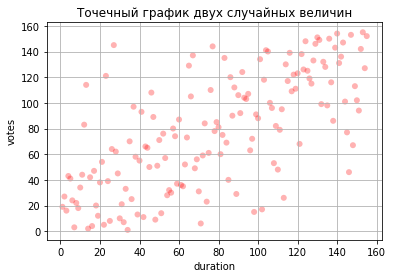

Коэффициент корреляции Пирсона: 0.6817698430601656


In [99]:
duration = df['Freedom']
votes = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(duration, votes, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('votes')
plt.title('Точечный график двух случайных величин')
plt.show()

from scipy.stats import pearsonr
duration = df['Freedom'].dropna()
votes = df['Positive affect'].dropna()
corr, p_value = pearsonr(duration, votes)
print('Коэффициент корреляции Пирсона:', corr)

#имеем дело со средней положительной корреляцией

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [100]:
duration = df['Freedom'].dropna()
print(statistics.mean(duration))
duration_1 = duration - statistics.mean(duration)
print(statistics.mean(duration_1))

#на выходе 0 - следовательно данные централизованы

78.0
0.0


In [69]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

duration_2 = min_max_scaler.fit_transform(np.array(duration_1).reshape(-1, 1))
print(min(duration_2))
print(max(duration_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

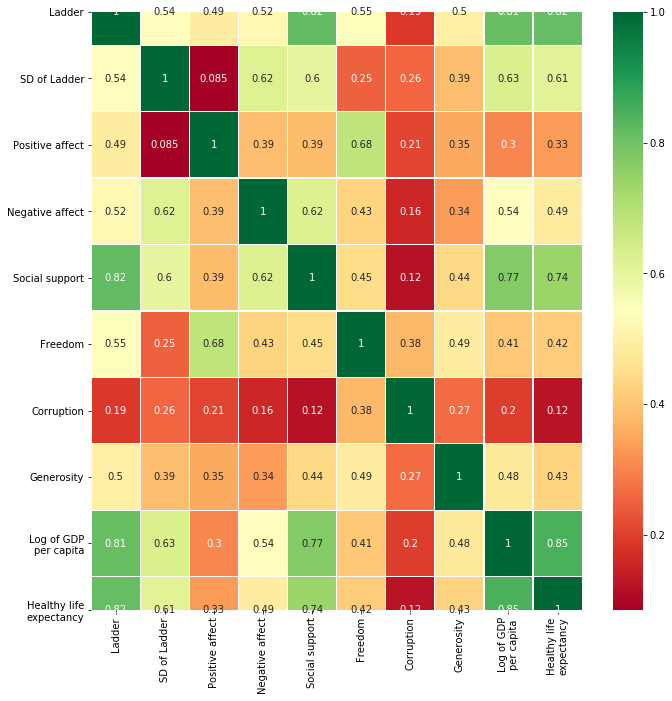

In [63]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(11,11)
plt.show()

#интересно что уровень коррупции хуже всего коррелирует с остальными данными

Загрузить таблицу цен на авокадо: 

In [101]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

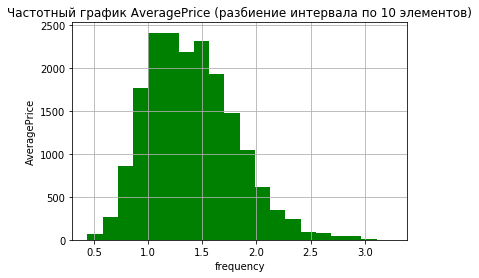

In [102]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['AveragePrice'], 20, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

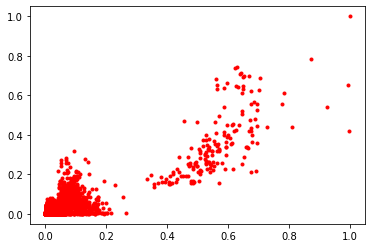

0.8878549976059532


In [88]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4225', '4770']])
df_norm = pd.DataFrame(np_scaled)
df_norm.head()
volume = df_norm[0]
bags = df_norm[1]
plt.plot(volume, bags, 'r.')
plt.show()
corr, p_value = pearsonr(volume, bags)
print(corr)

In [89]:
print('Корреляция между 4046 и 4225 составляет 0,92')
print('Корреляция между 4046 и 4770 составляет 0,83')
print('Корреляция между 4225 и 4770 составляет 0,88')
print('Корреляция между 4046 и AveragePrice составляет -0,20')
print('Корреляция между 4225 и AveragePrice составляет -0,17')
print('Корреляция между 4770 и AveragePrice составляет -0,17')

Корреляция между 4046 и 4225 составляет 0,92
Корреляция между 4046 и 4770 составляет 0,83
Корреляция между 4046 и AveragePrice составляет -0,20
Корреляция между 4225 и AveragePrice составляет -0,17
Корреляция между 4770 и AveragePrice составляет -0,17
Корреляция между 4225 и 4770 составляет 0,88
